In [ ]:
############### Comparison Step ##################

In [29]:
# --- Global History Storage (put these at the top of your notebook) ---
# These lists will store the metrics for each epoch for each model.
# Ensure 'num_epochs' is defined and consistent across all models.

# History for your HDVAE (assuming you have similar variables from its setup)
hdvae_psnr_history = []
hdvae_ssim_history = []
hdvae_loss_history = []

# History for Vanilla VAE
vanilla_vae_psnr_history = []
vanilla_vae_ssim_history = []
vanilla_vae_loss_history = []

# History for Beta-VAE
beta_vae_psnr_history = []
beta_vae_ssim_history = []
beta_vae_loss_history = []

# History for FactorVAE
factor_vae_psnr_history = []
factor_vae_ssim_history = []
factor_vae_loss_history = []

# History for DIP-VAE-I
dip_vae_psnr_history = []
dip_vae_ssim_history = []
dip_vae_loss_history = []

# Ensure your common parameters are defined, e.g.:
# num_epochs = 20 # Or whatever number you're using
# image_size = 784
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# fixed_test_images # This should also be defined once and used for all models

In [30]:
# Again the same as V4 . the only change is adding       psnr, ssim history
# V4: 3-layer Hierarchy + UMAP + z1z2z3 UMAP + Beta for KLD terms (MNIST)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import os
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np
import matplotlib.pyplot as plt
import umap # For UMAP visualization
from sklearn.manifold import TSNE # For t-SNE visualization (optional)
import seaborn as sns # For better looking plots

# (Your existing imports and Hyper-parameters)
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
image_size = 784
z1_dim = 64
z2_dim = 32
z3_dim = 16
num_epochs = 10 # Increased epochs for better latent space learning
batch_size = 128
learning_rate = 1e-3

# Create directories (ensure ./latent_space_plots exists)
os.makedirs('./sampled_images_hdvae', exist_ok=True)
os.makedirs('./plots_hdvae', exist_ok=True)
os.makedirs('./latent_space_plots', exist_ok=True) # New directory for latent space plots

# (Your existing dataset loading and HDVAE class definition)
# MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) # Use batch_size for collecting latents

test_loader_fixed_batch = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=8, shuffle=False)
fixed_test_images, _ = next(iter(test_loader_fixed_batch))
fixed_test_images = fixed_test_images.to(device)


HDVAE(
  (encoder_x_to_z1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
  )
  (fc_mu1): Linear(in_features=128, out_features=64, bias=True)
  (fc_logvar1): Linear(in_features=128, out_features=64, bias=True)
  (encoder_z1_to_z2): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
  )
  (fc_mu2): Linear(in_features=64, out_features=32, bias=True)
  (fc_logvar2): Linear(in_features=64, out_features=32, bias=True)
  (encoder_z2_to_z3): Sequential(
    (0): Linear(in_features=32, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (fc_mu3): Linear(in_features=64, out_feature

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


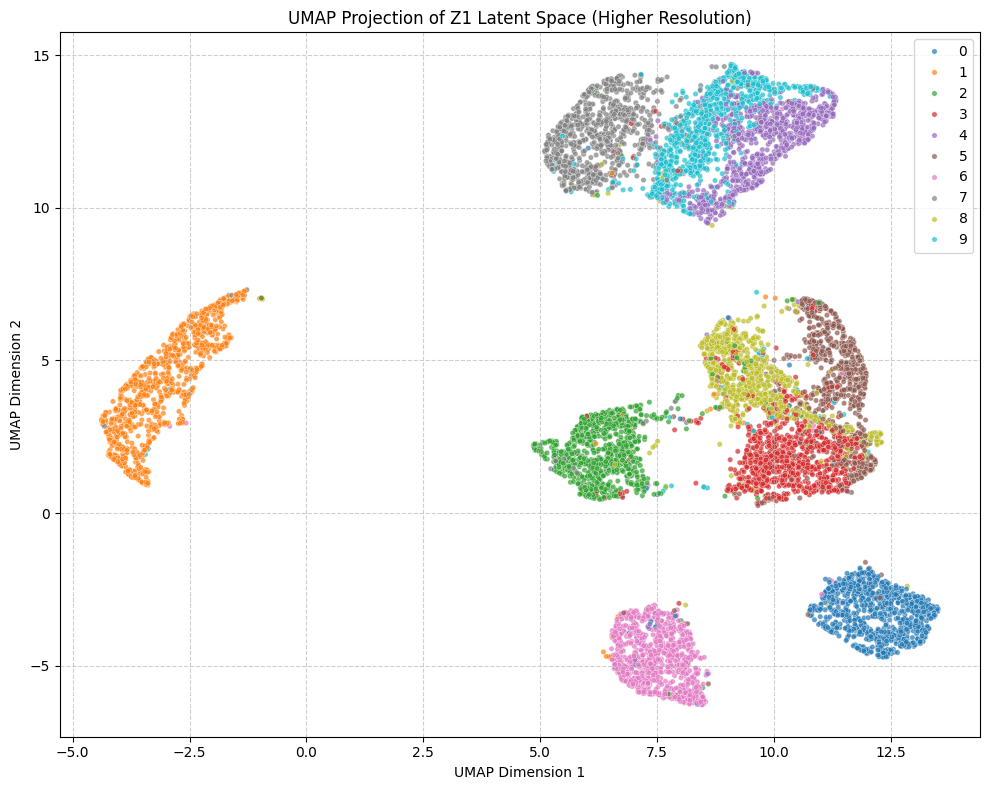

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


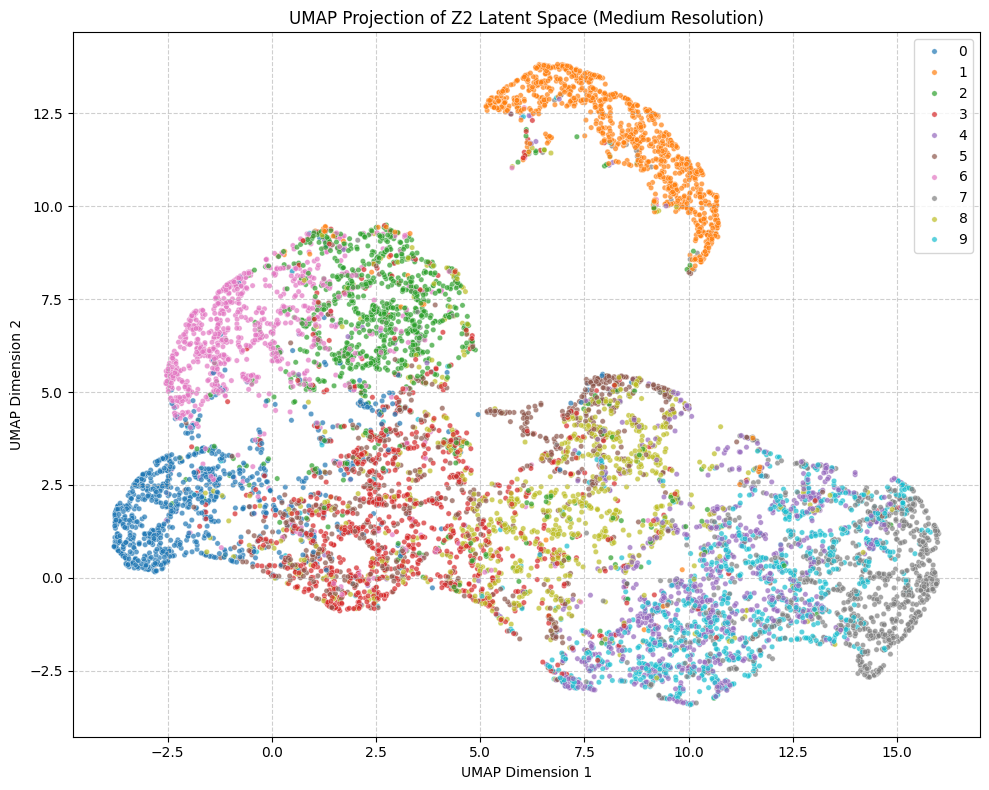

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


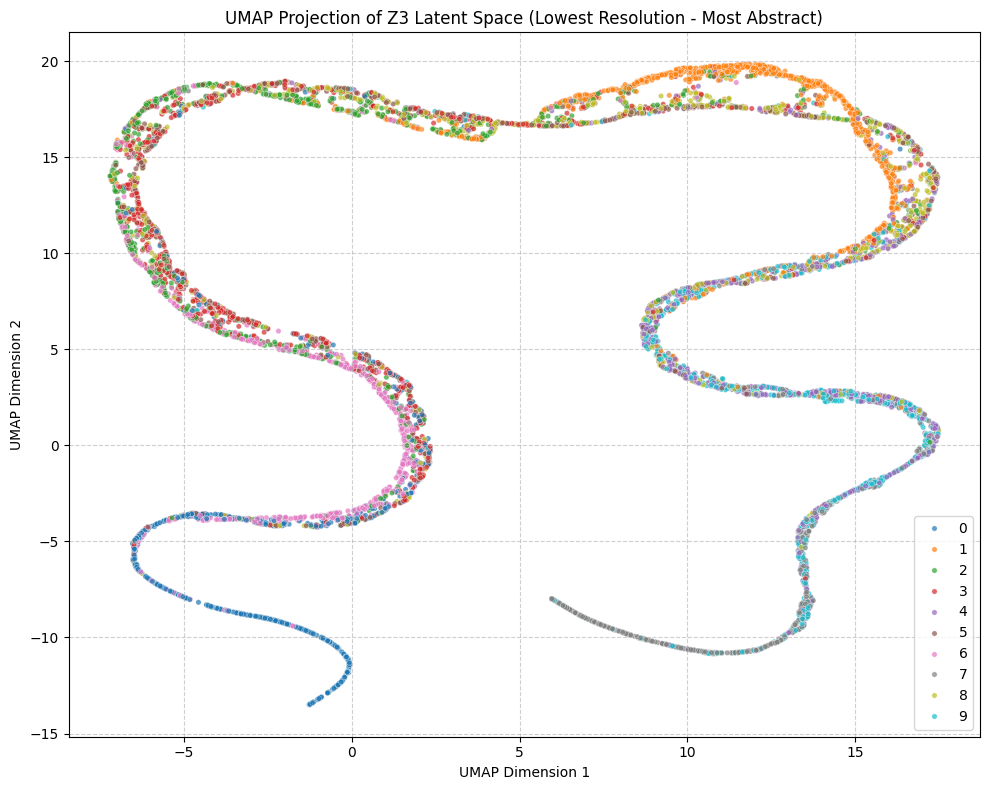

Latent space plots (by digit label) generated in './latent_space_plots/' directory.


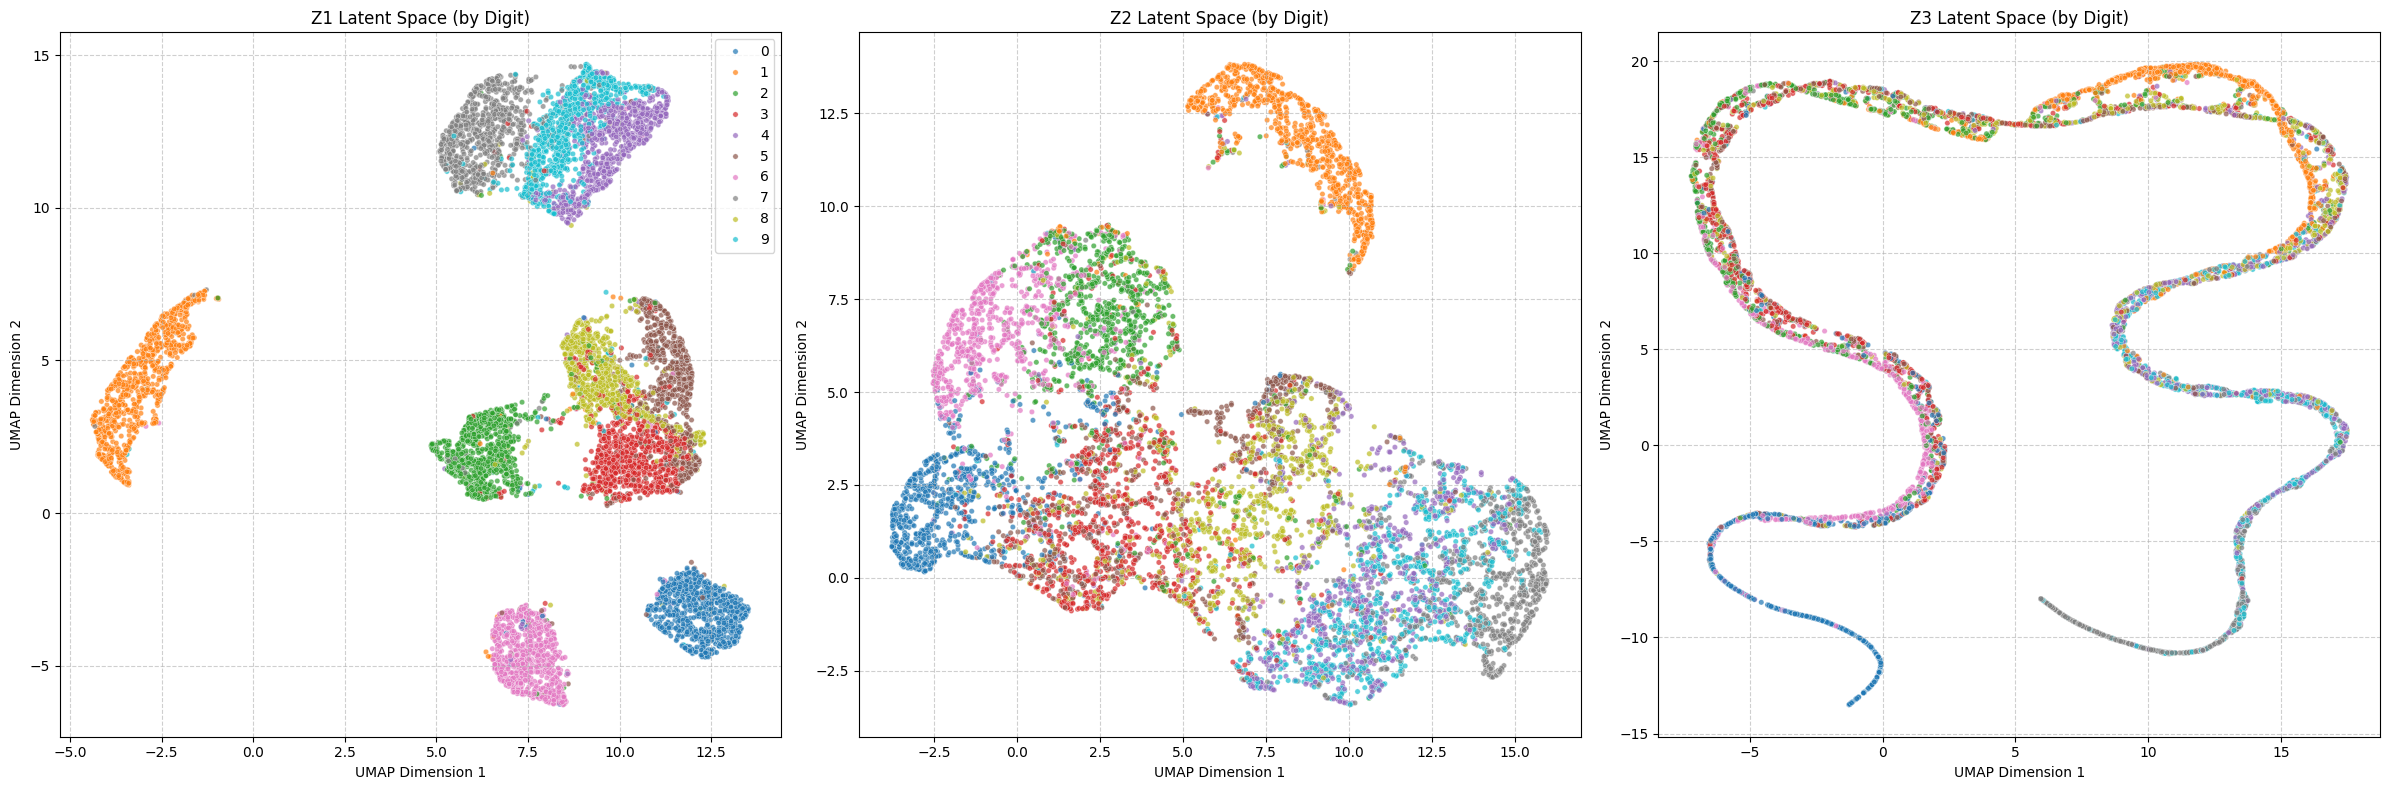


Preparing data for inter-layer UMAP plot...
Applying UMAP to combined latent spaces for inter-layer comparison (N=30000, D=64)...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


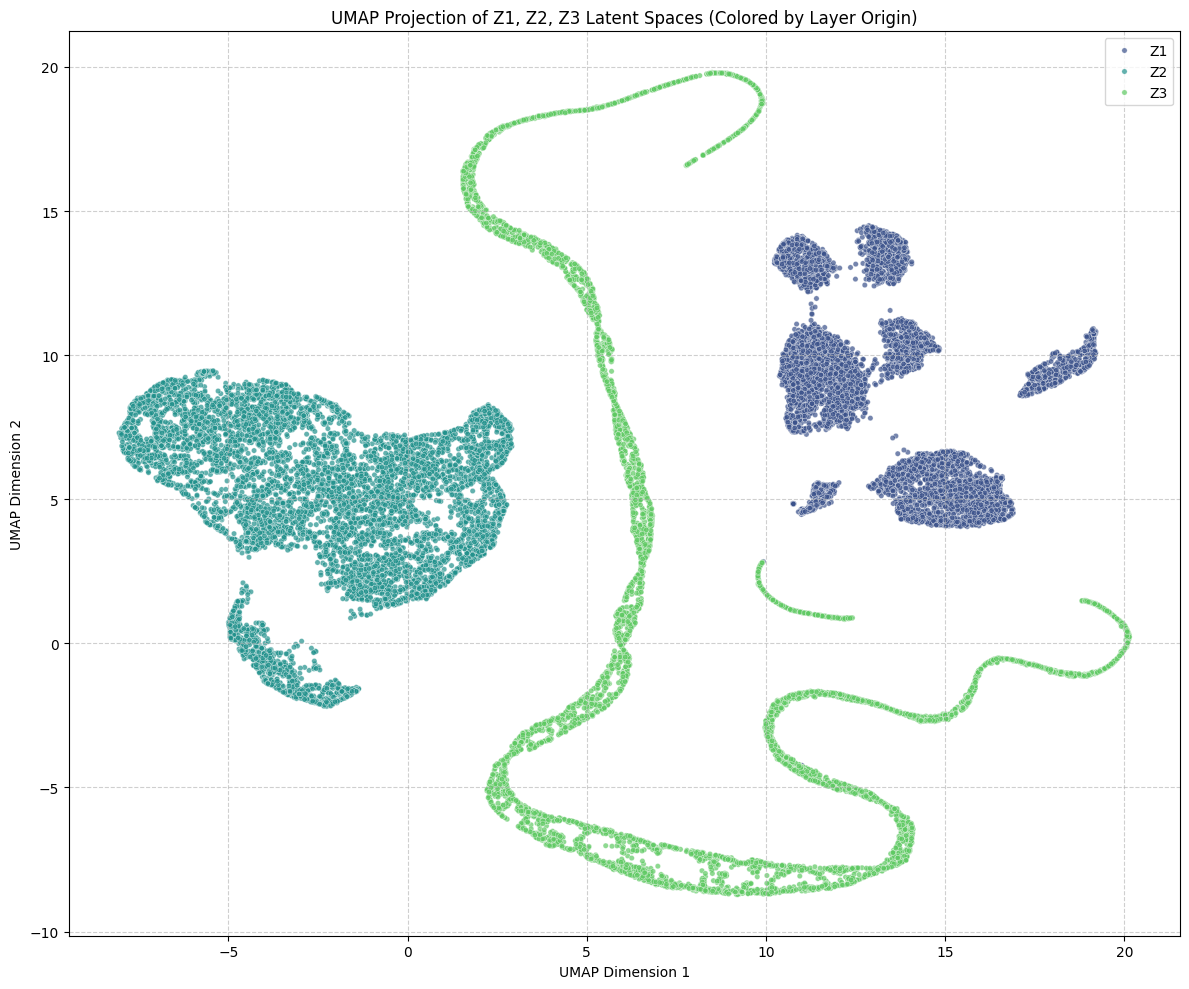

Inter-layer UMAP plot generated: ./latent_space_plots/umap_all_layers_combined.png


In [31]:

# HDVAE Model - 3 Hierarchical Latent Layers (z1, z2, z3) - Same as before
class HDVAE(nn.Module):
    def __init__(self, image_size, z1_dim, z2_dim, z3_dim):
        super(HDVAE, self).__init__()
        self.image_size = image_size
        self.z1_dim = z1_dim
        self.z2_dim = z2_dim
        self.z3_dim = z3_dim

        # Encoder X -> Z1 (Kept current deeper structure)
        self.encoder_x_to_z1 = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128)
        )
        self.fc_mu1 = nn.Linear(128, z1_dim)
        self.fc_logvar1 = nn.Linear(128, z1_dim)

        # Encoder Z1 -> Z2 (Kept current deeper structure)
        self.encoder_z1_to_z2 = nn.Sequential(
            nn.Linear(z1_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.fc_mu2 = nn.Linear(64, z2_dim)
        self.fc_logvar2 = nn.Linear(64, z2_dim)

        # NEW: Encoder Z2 -> Z3
        self.encoder_z2_to_z3 = nn.Sequential(
            nn.Linear(z2_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.fc_mu3 = nn.Linear(64, z3_dim)
        self.fc_logvar3 = nn.Linear(64, z3_dim)

        # NEW: Decoder Z3 -> Z2 (Prior for Z2)
        self.decoder_z3_to_z2_params = nn.Sequential(
            nn.Linear(z3_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128)
        )
        self.fc_prior_mu2 = nn.Linear(128, z2_dim)
        self.fc_prior_logvar2 = nn.Linear(128, z2_dim)

        # Decoder Z2 -> Z1 (Prior for Z1 - Kept current deeper structure)
        self.decoder_z2_to_z1_params = nn.Sequential(
            nn.Linear(z2_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128)
        )
        self.fc_prior_mu1 = nn.Linear(128, z1_dim)
        self.fc_prior_logvar1 = nn.Linear(128, z1_dim)

        # Decoder Z1 -> X (Kept current deeper structure)
        self.decoder_z1_to_x = nn.Sequential(
            nn.Linear(z1_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, image_size),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def encode(self, x):
        h1 = self.encoder_x_to_z1(x.view(-1, self.image_size))
        mu1, log_var1 = self.fc_mu1(h1), self.fc_logvar1(h1)
        z1 = self.reparameterize(mu1, log_var1)

        h2 = self.encoder_z1_to_z2(z1)
        mu2, log_var2 = self.fc_mu2(h2), self.fc_logvar2(h2)
        z2 = self.reparameterize(mu2, log_var2)

        h3 = self.encoder_z2_to_z3(z2)
        mu3, log_var3 = self.fc_mu3(h3), self.fc_logvar3(h3)
        z3 = self.reparameterize(mu3, log_var3)

        return (mu1, log_var1, z1), (mu2, log_var2, z2), (mu3, log_var3, z3)

    def decode(self, z1, z2, z3):
        x_reconst = self.decoder_z1_to_x(z1)

        h_prior_z1 = self.decoder_z2_to_z1_params(z2)
        mu_prior_1 = self.fc_prior_mu1(h_prior_z1)
        log_var_prior_1 = self.fc_prior_logvar1(h_prior_z1)

        h_prior_z2 = self.decoder_z3_to_z2_params(z3)
        mu_prior_2 = self.fc_prior_mu2(h_prior_z2)
        log_var_prior_2 = self.fc_prior_logvar2(h_prior_z2)

        return x_reconst, (mu_prior_1, log_var_prior_1), (mu_prior_2, log_var_prior_2)

    def forward(self, x):
        (mu1, log_var1, z1), (mu2, log_var2, z2), (mu3, log_var3, z3) = self.encode(x)
        x_reconst, (mu_prior_1, log_var_prior_1), (mu_prior_2, log_var_prior_2) = self.decode(z1, z2, z3)

        return x_reconst, mu1, log_var1, z1, mu2, log_var2, z2, mu3, log_var3, z3, \
               mu_prior_1, log_var_prior_1, mu_prior_2, log_var_prior_2

# Instantiate the model
model = HDVAE(image_size, z1_dim, z2_dim, z3_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print(model)

# Loss Function - Same as before
def loss_function_hdvae(recon_x, x, mu1, log_var1, mu2, log_var2, mu3, log_var3, mu_prior_1, log_var_prior_1, mu_prior_2, log_var_prior_2,
                        beta1=1.0, beta2=1.0, beta3=1.0): # Add beta parameters
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, image_size), reduction='sum')

    # Assuming Z3 is the top-most layer, so its prior is N(0,I)
    KLD_z3 = -0.5 * torch.sum(1 + log_var3 - mu3.pow(2) - log_var3.exp())

    KLD_z2 = 0.5 * torch.sum(
        torch.exp(log_var2 - log_var_prior_2) +
        ((mu_prior_2 - mu2)**2) * torch.exp(-log_var_prior_2) - 1 +
        (log_var_prior_2 - log_var2)
    )

    KLD_z1 = 0.5 * torch.sum(
        torch.exp(log_var1 - log_var_prior_1) +
        ((mu_prior_1 - mu1)**2) * torch.exp(-log_var_prior_1) - 1 +
        (log_var_prior_1 - log_var1)
    )

    # Apply beta factors
    return BCE + beta1 * KLD_z1 + beta2 * KLD_z2 + beta3 * KLD_z3

def calculate_metrics(original_images, reconstructed_images):
    original_np = original_images.detach().cpu().numpy().reshape(-1, 28, 28)
    reconstructed_np = reconstructed_images.detach().cpu().numpy().reshape(-1, 28, 28)
    psnr_scores = []
    ssim_scores = []
    for i in range(original_np.shape[0]):
        img_o = original_np[i]
        img_r = reconstructed_np[i]
        psnr = peak_signal_noise_ratio(img_o, img_r, data_range=1)
        psnr_scores.append(psnr)
        ssim = structural_similarity(img_o, img_r, data_range=1)
        ssim_scores.append(ssim)
    return np.mean(psnr_scores), np.mean(ssim_scores)

def plot_originals_and_reconstructions(original_images, reconstructed_images, title="", num_display=8):
    original_images = original_images.detach().cpu().squeeze()
    reconstructed_images = reconstructed_images.detach().cpu().squeeze()

    original_display = original_images[:num_display]
    reconstructed_display = reconstructed_images[:num_display]

    fig, axes = plt.subplots(2, num_display, figsize=(num_display * 1.5, 3))

    for i in range(num_display):
        axes[0, i].imshow(original_display[i].numpy(), cmap='gray')
        axes[0, i].axis('off')
        if i == 0: axes[0, i].set_title("Original", fontsize=8)

    for i in range(num_display):
        axes[1, i].imshow(reconstructed_display[i].numpy(), cmap='gray')
        axes[1, i].axis('off')
        if i == 0: axes[1, i].set_title("Reconstructed", fontsize=8)

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    plt.show()
    plt.close(fig)

def plot_sampled_images(sampled_images, title="", num_display=8, filename=None):
    sampled_images = sampled_images.detach().cpu().squeeze()

    fig, axes = plt.subplots(1, num_display, figsize=(num_display * 1.5, 1.5))

    for i in range(num_display):
        axes[i].imshow(sampled_images[i].numpy(), cmap='gray')
        axes[i].axis('off')

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    if filename:
        plt.savefig(filename)
    plt.show()
    plt.close(fig)

def plot_latent_space(latent_coords, labels, title, filename):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=latent_coords[:, 0], y=latent_coords[:, 1],
        hue=labels,
        palette=sns.color_palette("tab10", 10),
        legend="full",
        alpha=0.7,
        s=15 # Adjust point size
    )
    plt.title(title)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

def plot_all_latent_spaces_together(embeddings, labels, titles): # Removed filename, can save separately
    num_plots = len(embeddings)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 8))

    # Ensure axes is an array even for single plot case
    if num_plots == 1:
        axes = [axes]

    for i in range(num_plots):
        sns.scatterplot(
            x=embeddings[i][:, 0], y=embeddings[i][:, 1],
            hue=labels,
            palette=sns.color_palette("tab10", 10),
            legend="full" if i == 0 else False, # Only show legend once
            alpha=0.7,
            s=15,
            ax=axes[i] # Plot on specific subplot
        )
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("UMAP Dimension 1")
        axes[i].set_ylabel("UMAP Dimension 2")
        axes[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig(os.path.join("./latent_space_plots/", "all_umap_plots_combined_by_digit.png")) # Save for clarity
    plt.show()
    plt.close()


# --- NEW FUNCTION: Plotting Z1, Z2, Z3 on one UMAP ---
def plot_inter_layer_umap(all_latent_data, layer_labels, filename):
    """
    Plots the UMAP projection of concatenated Z1, Z2, Z3 means,
    colored by their originating layer (Z1, Z2, Z3).

    Args:
        all_latent_data (np.array): Concatenated mu1, mu2, mu3 data.
        layer_labels (np.array): Labels indicating origin layer ('Z1', 'Z2', 'Z3').
        filename (str): Path to save the plot.
    """
    print(f"Applying UMAP to combined latent spaces for inter-layer comparison (N={all_latent_data.shape[0]}, D={all_latent_data.shape[1]})...")

    # Initialize UMAP reducer. Adjust n_neighbors and min_dist if needed for different structures.
    # n_neighbors=15 (default) works well for balanced local/global structure.
    # For denser, more separated clusters, try lower min_dist (e.g., 0.1).
    reducer_combined = umap.UMAP(random_state=42)
    embedding_combined = reducer_combined.fit_transform(all_latent_data)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=embedding_combined[:, 0], y=embedding_combined[:, 1],
        hue=layer_labels,
        palette="viridis", # Or "deep", "Paired", etc. for distinct colors
        legend="full",
        alpha=0.7,
        s=15
    )
    plt.title("UMAP Projection of Z1, Z2, Z3 Latent Spaces (Colored by Layer Origin)")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()
    print(f"Inter-layer UMAP plot generated: {filename}")


# --- Training Loop (as before) ---
# --- Variables to store reconstruction and sampled data for the last epoch ---
last_epoch_original_images = None
last_epoch_reconstructed_images = None
last_epoch_sampled_images = None


# Training loop
print("Starting HDVAE training with 3 hierarchical layers...")
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)

        recon_images, mu1, log_var1, z1, mu2, log_var2, z2, mu3, log_var3, z3, \
               mu_prior_1, log_var_prior_1, mu_prior_2, log_var_prior_2 = model(images)


        ### MRH:
        ################ linear annealing for Beta  in loss function:
        num_annealing_epochs = num_epochs / 2
        beta_annealing_factor = min(1.0, epoch / num_annealing_epochs) # e.g., num_annealing_epochs = num_epochs / 2
        max_beta1 = 5 #0.5
        max_beta2 = 4 #0.2
        max_beta3 = 3 #0.1
        current_beta1 = beta_annealing_factor * max_beta1
        current_beta2 = beta_annealing_factor * max_beta2
        current_beta3 = beta_annealing_factor * max_beta3
        ################

        loss = loss_function_hdvae(recon_images, images,
                                   mu1, log_var1,
                                   mu2, log_var2,
                                   mu3, log_var3,
                                   mu_prior_1, log_var_prior_1,
                                   mu_prior_2, log_var_prior_2, beta1=current_beta1, beta2=current_beta2, beta3=current_beta3)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    avg_loss = total_loss / len(train_loader.dataset)

    # --- Evaluation ---
    model.eval()
    with torch.no_grad():
        recon_images_fixed_current_epoch, _, _, _, _, _, _, _, _, _, _, _, _, _ = model(fixed_test_images)

        last_epoch_original_images = fixed_test_images.clone().detach()
        last_epoch_reconstructed_images = recon_images_fixed_current_epoch.view(-1, 1, 28, 28).clone().detach()

        z3_sample = torch.randn(8, z3_dim).to(device)
        h_prior_z2_sample = model.decoder_z3_to_z2_params(z3_sample)
        mu_prior_2_sample = model.fc_prior_mu2(h_prior_z2_sample)
        log_var_prior_2_sample = model.fc_prior_logvar2(h_prior_z2_sample)
        z2_sample = model.reparameterize(mu_prior_2_sample, log_var_prior_2_sample)

        h_prior_z1_sample = model.decoder_z2_to_z1_params(z2_sample)
        mu_prior_1_sample = model.fc_prior_mu1(h_prior_z1_sample)
        log_var_prior_1_sample = model.fc_prior_logvar1(h_prior_z1_sample)
        z1_sample = model.reparameterize(mu_prior_1_sample, log_var_prior_1_sample)

        sampled_out = model.decoder_z1_to_x(z1_sample).view(-1, 1, 28, 28)
        last_epoch_sampled_images = sampled_out.clone().detach()

        psnr, ssim = calculate_metrics(fixed_test_images, recon_images_fixed_current_epoch)

        print(f"Epoch [{epoch+1}/{num_epochs}] completed. Avg Loss: {avg_loss:.4f}, PSNR: {psnr:.2f}, SSIM: {ssim:.4f}")

        # --- ADD THESE LINES TO YOUR HDVAE TRAINING LOOP ---
        hdvae_psnr_history.append(psnr)
        hdvae_ssim_history.append(ssim)
        hdvae_loss_history.append(avg_loss) # Make sure this is the average training loss per epoch

print("Training complete!")


# --- Post-training Latent Space Visualization (Existing Code) ---
print("\nCollecting latent space means for visualization (by digit label)...")
all_mu1s = []
all_mu2s = []
all_mu3s = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        (mu1, _, _), (mu2, _, _), (mu3, _, _) = model.encode(images)

        all_mu1s.append(mu1.cpu().numpy())
        all_mu2s.append(mu2.cpu().numpy())
        all_mu3s.append(mu3.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_mu1s = np.concatenate(all_mu1s, axis=0)
all_mu2s = np.concatenate(all_mu2s, axis=0)
all_mu3s = np.concatenate(all_mu3s, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

print("Applying UMAP to latent space means (by digit label)...")

reducer_z1 = umap.UMAP(random_state=42)
embedding_z1 = reducer_z1.fit_transform(all_mu1s)
plot_latent_space(embedding_z1, all_labels,
                  "UMAP Projection of Z1 Latent Space (Higher Resolution)",
                  "./latent_space_plots/umap_z1_by_digit.png")

reducer_z2 = umap.UMAP(random_state=42)
embedding_z2 = reducer_z2.fit_transform(all_mu2s)
plot_latent_space(embedding_z2, all_labels,
                  "UMAP Projection of Z2 Latent Space (Medium Resolution)",
                  "./latent_space_plots/umap_z2_by_digit.png")

reducer_z3 = umap.UMAP(random_state=42)
embedding_z3 = reducer_z3.fit_transform(all_mu3s)
plot_latent_space(embedding_z3, all_labels,
                  "UMAP Projection of Z3 Latent Space (Lowest Resolution - Most Abstract)",
                  "./latent_space_plots/umap_z3_by_digit.png")

print("Latent space plots (by digit label) generated in './latent_space_plots/' directory.")

# Call the combined plot for digit labels as well
plot_all_latent_spaces_together(
    [embedding_z1, embedding_z2, embedding_z3],
    all_labels,
    ["Z1 Latent Space (by Digit)", "Z2 Latent Space (by Digit)", "Z3 Latent Space (by Digit)"]
)

# --- NEW SECTION: Prepare data for inter-layer UMAP plot ---
print("\nPreparing data for inter-layer UMAP plot...")

# 1. Pad/Truncate Latent Vectors to a Common Dimension
# Find the maximum dimension
max_dim = max(z1_dim, z2_dim, z3_dim)

# Function to pad/truncate
def adjust_dimension(data, target_dim):
    current_dim = data.shape[1]
    if current_dim < target_dim:
        padding = np.zeros((data.shape[0], target_dim - current_dim))
        return np.concatenate((data, padding), axis=1)
    elif current_dim > target_dim:
        return data[:, :target_dim]
    else:
        return data

# Adjust all mu's to the maximum dimension
all_mu1s_adjusted = adjust_dimension(all_mu1s, max_dim)
all_mu2s_adjusted = adjust_dimension(all_mu2s, max_dim)
all_mu3s_adjusted = adjust_dimension(all_mu3s, max_dim)

# 2. Concatenate them
# Create labels for each layer
layer_labels_z1 = np.full(all_mu1s_adjusted.shape[0], 'Z1')
layer_labels_z2 = np.full(all_mu2s_adjusted.shape[0], 'Z2')
layer_labels_z3 = np.full(all_mu3s_adjusted.shape[0], 'Z3')

# Concatenate the data and the labels
all_latent_data_combined = np.concatenate((all_mu1s_adjusted, all_mu2s_adjusted, all_mu3s_adjusted), axis=0)
all_layer_labels_combined = np.concatenate((layer_labels_z1, layer_labels_z2, layer_labels_z3), axis=0)

# 3. Call the new plotting function
plot_inter_layer_umap(all_latent_data_combined, all_layer_labels_combined,
                      "./latent_space_plots/umap_all_layers_combined.png")

# --- Final Display (as before) ---
# ... (your existing code for displaying last epoch reconstructions and generated images) ...

In [ ]:
# V4: Vanila VAE for comparison
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import os
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np
import matplotlib.pyplot as plt
import umap # For UMAP visualization
from sklearn.manifold import TSNE # For t-SNE visualization (optional)
import seaborn as sns # For better looking plots

# (Your existing imports and Hyper-parameters)
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
image_size = 784
z1_dim = 64
z2_dim = 32
z3_dim = 16
num_epochs = 20 # Increased epochs for better latent space learning
batch_size = 128
learning_rate = 1e-3

# Create directories (ensure ./latent_space_plots exists)
os.makedirs('./sampled_images_hdvae', exist_ok=True)
os.makedirs('./plots_hdvae', exist_ok=True)
os.makedirs('./latent_space_plots', exist_ok=True) # New directory for latent space plots

# (Your existing dataset loading and HDVAE class definition)
# MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) # Use batch_size for collecting latents

test_loader_fixed_batch = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=8, shuffle=False)
fixed_test_images, _ = next(iter(test_loader_fixed_batch))
fixed_test_images = fixed_test_images.to(device)


class VanillaVAE(nn.Module):
    def __init__(self, image_size, z_dim):
        super(VanillaVAE, self).__init__()
        self.image_size = image_size
        self.z_dim = z_dim

        # Encoder (similar to HDVAE's encoder_x_to_z1, adjusted for z_dim)
        self.encoder = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128)
        )
        self.fc_mu = nn.Linear(128, z_dim)
        self.fc_logvar = nn.Linear(128, z_dim)

        # Decoder (similar to HDVAE's decoder_z1_to_x)
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, image_size),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        h = self.encoder(x.view(-1, self.image_size))
        mu = self.fc_mu(h)
        log_var = self.fc_logvar(h)
        z = self.reparameterize(mu, log_var)

        # Decode
        recon_x = self.decoder(z)
        return recon_x, mu, log_var

# Instantiate the model
model = HDVAE(image_size, z1_dim, z2_dim, z3_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# print(model)

# --- Loss Function for Vanilla VAE ---
def loss_function_vanilla_vae(recon_x, x, mu, log_var, beta=1.0):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, image_size), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + beta * KLD

def calculate_metrics(original_images, reconstructed_images):
    original_np = original_images.detach().cpu().numpy().reshape(-1, 28, 28)
    reconstructed_np = reconstructed_images.detach().cpu().numpy().reshape(-1, 28, 28)
    psnr_scores = []
    ssim_scores = []
    for i in range(original_np.shape[0]):
        img_o = original_np[i]
        img_r = reconstructed_np[i]
        psnr = peak_signal_noise_ratio(img_o, img_r, data_range=1)
        psnr_scores.append(psnr)
        ssim = structural_similarity(img_o, img_r, data_range=1)
        ssim_scores.append(ssim)
    return np.mean(psnr_scores), np.mean(ssim_scores)

def plot_originals_and_reconstructions(original_images, reconstructed_images, title="", num_display=8):
    original_images = original_images.detach().cpu().squeeze()
    reconstructed_images = reconstructed_images.detach().cpu().squeeze()

    original_display = original_images[:num_display]
    reconstructed_display = reconstructed_images[:num_display]

    fig, axes = plt.subplots(2, num_display, figsize=(num_display * 1.5, 3))

    for i in range(num_display):
        axes[0, i].imshow(original_display[i].numpy(), cmap='gray')
        axes[0, i].axis('off')
        if i == 0: axes[0, i].set_title("Original", fontsize=8)

    for i in range(num_display):
        axes[1, i].imshow(reconstructed_display[i].numpy(), cmap='gray')
        axes[1, i].axis('off')
        if i == 0: axes[1, i].set_title("Reconstructed", fontsize=8)

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    plt.show()
    plt.close(fig)

def plot_sampled_images(sampled_images, title="", num_display=8, filename=None):
    sampled_images = sampled_images.detach().cpu().squeeze()

    fig, axes = plt.subplots(1, num_display, figsize=(num_display * 1.5, 1.5))

    for i in range(num_display):
        axes[i].imshow(sampled_images[i].numpy(), cmap='gray')
        axes[i].axis('off')

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    if filename:
        plt.savefig(filename)
    plt.show()
    plt.close(fig)

def plot_latent_space(latent_coords, labels, title, filename):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=latent_coords[:, 0], y=latent_coords[:, 1],
        hue=labels,
        palette=sns.color_palette("tab10", 10),
        legend="full",
        alpha=0.7,
        s=15 # Adjust point size
    )
    plt.title(title)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

def plot_all_latent_spaces_together(embeddings, labels, titles): # Removed filename, can save separately
    num_plots = len(embeddings)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 8))

    # Ensure axes is an array even for single plot case
    if num_plots == 1:
        axes = [axes]

    for i in range(num_plots):
        sns.scatterplot(
            x=embeddings[i][:, 0], y=embeddings[i][:, 1],
            hue=labels,
            palette=sns.color_palette("tab10", 10),
            legend="full" if i == 0 else False, # Only show legend once
            alpha=0.7,
            s=15,
            ax=axes[i] # Plot on specific subplot
        )
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("UMAP Dimension 1")
        axes[i].set_ylabel("UMAP Dimension 2")
        axes[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig(os.path.join("./latent_space_plots/", "all_umap_plots_combined_by_digit.png")) # Save for clarity
    plt.show()
    plt.close()


# --- NEW FUNCTION: Plotting Z1, Z2, Z3 on one UMAP ---
def plot_inter_layer_umap(all_latent_data, layer_labels, filename):
    """
    Plots the UMAP projection of concatenated Z1, Z2, Z3 means,
    colored by their originating layer (Z1, Z2, Z3).

    Args:
        all_latent_data (np.array): Concatenated mu1, mu2, mu3 data.
        layer_labels (np.array): Labels indicating origin layer ('Z1', 'Z2', 'Z3').
        filename (str): Path to save the plot.
    """
    print(f"Applying UMAP to combined latent spaces for inter-layer comparison (N={all_latent_data.shape[0]}, D={all_latent_data.shape[1]})...")

    # Initialize UMAP reducer. Adjust n_neighbors and min_dist if needed for different structures.
    # n_neighbors=15 (default) works well for balanced local/global structure.
    # For denser, more separated clusters, try lower min_dist (e.g., 0.1).
    reducer_combined = umap.UMAP(random_state=42)
    embedding_combined = reducer_combined.fit_transform(all_latent_data)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=embedding_combined[:, 0], y=embedding_combined[:, 1],
        hue=layer_labels,
        palette="viridis", # Or "deep", "Paired", etc. for distinct colors
        legend="full",
        alpha=0.7,
        s=15
    )
    plt.title("UMAP Projection of Z1, Z2, Z3 Latent Spaces (Colored by Layer Origin)")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()
    print(f"Inter-layer UMAP plot generated: {filename}")


# --- Training Loop (as before) ---
# --- Variables to store reconstruction and sampled data for the last epoch ---
last_epoch_original_images = None
last_epoch_reconstructed_images = None
last_epoch_sampled_images = None


vanilla_z_dim = z1_dim # Let's use 64 for a direct comparison with the first layer of HDVAE

vanilla_vae_model = VanillaVAE(image_size, vanilla_z_dim).to(device)
vanilla_vae_optimizer = torch.optim.Adam(vanilla_vae_model.parameters(), lr=learning_rate)

print("\n--- Vanilla VAE Model ---")
# print(vanilla_vae_model)

# --- Training Loop for Vanilla VAE ---
print("\nStarting Vanilla VAE training...")
for epoch in range(num_epochs): # Using the same num_epochs as HDVAE for direct comparison
    vanilla_vae_model.train()
    total_loss = 0
    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)

        recon_images, mu, log_var = vanilla_vae_model(images)

        # You can also apply beta annealing here if you want to be consistent with HDVAE
        # current_beta = min(1.0, epoch / (num_epochs / 2)) # Example simple linear annealing
        # loss = loss_function_vanilla_vae(recon_images, images, mu, log_var, beta=current_beta)

        loss = loss_function_vanilla_vae(recon_images, images, mu, log_var) # Using beta=1.0 by default

        vanilla_vae_optimizer.zero_grad()
        loss.backward()
        vanilla_vae_optimizer.step()

        total_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f"Vanilla VAE - Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    avg_loss = total_loss / len(train_loader.dataset)

    # --- Vanilla VAE Evaluation (similar to HDVAE evaluation) ---
    vanilla_vae_model.eval()
    with torch.no_grad():
        recon_images_fixed_current_epoch_vanilla, _, _ = vanilla_vae_model(fixed_test_images)

        # Sampling from Vanilla VAE
        z_sample_vanilla = torch.randn(8, vanilla_z_dim).to(device)
        sampled_out_vanilla = vanilla_vae_model.decoder(z_sample_vanilla).view(-1, 1, 28, 28)

        psnr_vanilla, ssim_vanilla = calculate_metrics(fixed_test_images, recon_images_fixed_current_epoch_vanilla)

        print(f"Vanilla VAE - Epoch [{epoch+1}/{num_epochs}] completed. Avg Loss: {avg_loss:.4f}, PSNR: {psnr_vanilla:.2f}, SSIM: {ssim_vanilla:.4f}")

        # --- ADD THESE LINES ---
        vanilla_vae_psnr_history.append(psnr_vanilla)
        vanilla_vae_ssim_history.append(ssim_vanilla)
        vanilla_vae_loss_history.append(avg_loss)

# --- Post-training Visualization for Vanilla VAE ---
print("\nCollecting Vanilla VAE latent space means for visualization (by digit label)...")
all_vanilla_mus = []
all_vanilla_labels = []

vanilla_vae_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        _, mu, _ = vanilla_vae_model(images) # Only need mu for UMAP

        all_vanilla_mus.append(mu.cpu().numpy())
        all_vanilla_labels.append(labels.cpu().numpy())

all_vanilla_mus = np.concatenate(all_vanilla_mus, axis=0)
all_vanilla_labels = np.concatenate(all_vanilla_labels, axis=0)

print("Applying UMAP to Vanilla VAE latent space means (by digit label)...")
reducer_vanilla_vae = umap.UMAP(random_state=42)
embedding_vanilla_vae = reducer_vanilla_vae.fit_transform(all_vanilla_mus)
plot_latent_space(embedding_vanilla_vae, all_vanilla_labels,
                  "UMAP Projection of Vanilla VAE Latent Space",
                  "./latent_space_plots/umap_vanilla_vae_by_digit.png")

print("Vanilla VAE latent space plot generated in './latent_space_plots/' directory.")



Starting Beta-VAE training with beta = 4.0...
Beta-VAE - Epoch [1/10], Step [100/469], Loss: 26641.3965
Beta-VAE - Epoch [1/10], Step [200/469], Loss: 25401.5215
Beta-VAE - Epoch [1/10], Step [300/469], Loss: 25526.7480
Beta-VAE - Epoch [1/10], Step [400/469], Loss: 24286.4297
Beta-VAE - Epoch [1/10] completed. Avg Loss: 202.8875, PSNR: 13.90, SSIM: 0.3967
Beta-VAE - Epoch [2/10], Step [100/469], Loss: 22429.3789
Beta-VAE - Epoch [2/10], Step [200/469], Loss: 20996.7559
Beta-VAE - Epoch [2/10], Step [300/469], Loss: 22356.0078
Beta-VAE - Epoch [2/10], Step [400/469], Loss: 20755.4961
Beta-VAE - Epoch [2/10] completed. Avg Loss: 175.8168, PSNR: 14.99, SSIM: 0.5197
Beta-VAE - Epoch [3/10], Step [100/469], Loss: 21289.5059
Beta-VAE - Epoch [3/10], Step [200/469], Loss: 20909.3984
Beta-VAE - Epoch [3/10], Step [300/469], Loss: 20474.1602
Beta-VAE - Epoch [3/10], Step [400/469], Loss: 20203.6016
Beta-VAE - Epoch [3/10] completed. Avg Loss: 163.0657, PSNR: 15.66, SSIM: 0.6025
Beta-VAE - Epo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


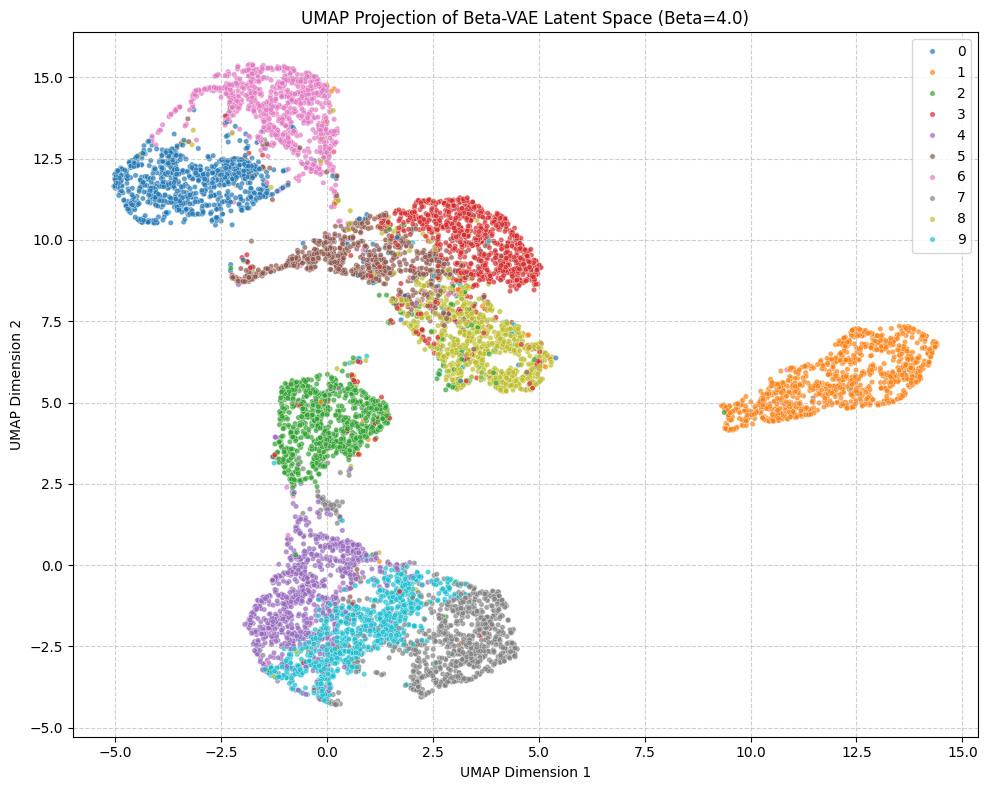

Beta-VAE latent space plot generated in './latent_space_plots/' directory.


In [32]:
# V4: Beta-VAE for comparison


class BetaVAE(nn.Module):
    def __init__(self, image_size, z_dim):
        super(BetaVAE, self).__init__()
        self.image_size = image_size
        self.z_dim = z_dim

        # Encoder (identical to Vanilla VAE and HDVAE's encoder_x_to_z1 part)
        self.encoder = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128)
        )
        self.fc_mu = nn.Linear(128, z_dim)
        self.fc_logvar = nn.Linear(128, z_dim)

        # Decoder (identical to Vanilla VAE and HDVAE's decoder_z1_to_x part)
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, image_size),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        h = self.encoder(x.view(-1, self.image_size))
        mu = self.fc_mu(h)
        log_var = self.fc_logvar(h)
        z = self.reparameterize(mu, log_var)

        # Decode
        recon_x = self.decoder(z)
        return recon_x, mu, log_var

# Instantiate the model
model = HDVAE(image_size, z1_dim, z2_dim, z3_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#print(model)

# --- Loss Function for Vanilla VAE ---
def loss_function_beta_vae(recon_x, x, mu, log_var, beta): # beta is now a required argument
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, image_size), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + beta * KLD

def calculate_metrics(original_images, reconstructed_images):
    original_np = original_images.detach().cpu().numpy().reshape(-1, 28, 28)
    reconstructed_np = reconstructed_images.detach().cpu().numpy().reshape(-1, 28, 28)
    psnr_scores = []
    ssim_scores = []
    for i in range(original_np.shape[0]):
        img_o = original_np[i]
        img_r = reconstructed_np[i]
        psnr = peak_signal_noise_ratio(img_o, img_r, data_range=1)
        psnr_scores.append(psnr)
        ssim = structural_similarity(img_o, img_r, data_range=1)
        ssim_scores.append(ssim)
    return np.mean(psnr_scores), np.mean(ssim_scores)

def plot_originals_and_reconstructions(original_images, reconstructed_images, title="", num_display=8):
    original_images = original_images.detach().cpu().squeeze()
    reconstructed_images = reconstructed_images.detach().cpu().squeeze()

    original_display = original_images[:num_display]
    reconstructed_display = reconstructed_images[:num_display]

    fig, axes = plt.subplots(2, num_display, figsize=(num_display * 1.5, 3))

    for i in range(num_display):
        axes[0, i].imshow(original_display[i].numpy(), cmap='gray')
        axes[0, i].axis('off')
        if i == 0: axes[0, i].set_title("Original", fontsize=8)

    for i in range(num_display):
        axes[1, i].imshow(reconstructed_display[i].numpy(), cmap='gray')
        axes[1, i].axis('off')
        if i == 0: axes[1, i].set_title("Reconstructed", fontsize=8)

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    plt.show()
    plt.close(fig)

def plot_sampled_images(sampled_images, title="", num_display=8, filename=None):
    sampled_images = sampled_images.detach().cpu().squeeze()

    fig, axes = plt.subplots(1, num_display, figsize=(num_display * 1.5, 1.5))

    for i in range(num_display):
        axes[i].imshow(sampled_images[i].numpy(), cmap='gray')
        axes[i].axis('off')

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    if filename:
        plt.savefig(filename)
    plt.show()
    plt.close(fig)

def plot_latent_space(latent_coords, labels, title, filename):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=latent_coords[:, 0], y=latent_coords[:, 1],
        hue=labels,
        palette=sns.color_palette("tab10", 10),
        legend="full",
        alpha=0.7,
        s=15 # Adjust point size
    )
    plt.title(title)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

def plot_all_latent_spaces_together(embeddings, labels, titles): # Removed filename, can save separately
    num_plots = len(embeddings)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 8))

    # Ensure axes is an array even for single plot case
    if num_plots == 1:
        axes = [axes]

    for i in range(num_plots):
        sns.scatterplot(
            x=embeddings[i][:, 0], y=embeddings[i][:, 1],
            hue=labels,
            palette=sns.color_palette("tab10", 10),
            legend="full" if i == 0 else False, # Only show legend once
            alpha=0.7,
            s=15,
            ax=axes[i] # Plot on specific subplot
        )
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("UMAP Dimension 1")
        axes[i].set_ylabel("UMAP Dimension 2")
        axes[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig(os.path.join("./latent_space_plots/", "all_umap_plots_combined_by_digit.png")) # Save for clarity
    plt.show()
    plt.close()


# --- NEW FUNCTION: Plotting Z1, Z2, Z3 on one UMAP ---
def plot_inter_layer_umap(all_latent_data, layer_labels, filename):
    """
    Plots the UMAP projection of concatenated Z1, Z2, Z3 means,
    colored by their originating layer (Z1, Z2, Z3).

    Args:
        all_latent_data (np.array): Concatenated mu1, mu2, mu3 data.
        layer_labels (np.array): Labels indicating origin layer ('Z1', 'Z2', 'Z3').
        filename (str): Path to save the plot.
    """
    print(f"Applying UMAP to combined latent spaces for inter-layer comparison (N={all_latent_data.shape[0]}, D={all_latent_data.shape[1]})...")

    # Initialize UMAP reducer. Adjust n_neighbors and min_dist if needed for different structures.
    # n_neighbors=15 (default) works well for balanced local/global structure.
    # For denser, more separated clusters, try lower min_dist (e.g., 0.1).
    reducer_combined = umap.UMAP(random_state=42)
    embedding_combined = reducer_combined.fit_transform(all_latent_data)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=embedding_combined[:, 0], y=embedding_combined[:, 1],
        hue=layer_labels,
        palette="viridis", # Or "deep", "Paired", etc. for distinct colors
        legend="full",
        alpha=0.7,
        s=15
    )
    plt.title("UMAP Projection of Z1, Z2, Z3 Latent Spaces (Colored by Layer Origin)")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()
    print(f"Inter-layer UMAP plot generated: {filename}")


# --- Training Loop (as before) ---
# --- Variables to store reconstruction and sampled data for the last epoch ---
last_epoch_original_images = None
last_epoch_reconstructed_images = None
last_epoch_sampled_images = None


beta_vae_z_dim = z1_dim # Still 64

# Choose a beta value. Common values are 4 or 8 to encourage disentanglement.
# Let's start with 4.0. You can experiment with this.
beta_vae_beta_value = 4.0

beta_vae_model = BetaVAE(image_size, beta_vae_z_dim).to(device)
beta_vae_optimizer = torch.optim.Adam(beta_vae_model.parameters(), lr=learning_rate)

#print("\n--- Beta-VAE Model ---")
#print(beta_vae_model)

# --- Training Loop for Beta-VAE ---
print(f"\nStarting Beta-VAE training with beta = {beta_vae_beta_value}...")
for epoch in range(num_epochs): # Using the same num_epochs as HDVAE for direct comparison
    beta_vae_model.train()
    total_loss = 0
    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)

        recon_images, mu, log_var = beta_vae_model(images)

        # Here we pass the fixed beta_vae_beta_value
        loss = loss_function_beta_vae(recon_images, images, mu, log_var, beta=beta_vae_beta_value)

        beta_vae_optimizer.zero_grad()
        loss.backward()
        beta_vae_optimizer.step()

        total_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f"Beta-VAE - Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    avg_loss = total_loss / len(train_loader.dataset)

    # --- Beta-VAE Evaluation (similar to HDVAE evaluation) ---
    beta_vae_model.eval()
    with torch.no_grad():
        recon_images_fixed_current_epoch_beta_vae, _, _ = beta_vae_model(fixed_test_images)

        # Sampling from Beta-VAE
        z_sample_beta_vae = torch.randn(8, beta_vae_z_dim).to(device)
        sampled_out_beta_vae = beta_vae_model.decoder(z_sample_beta_vae).view(-1, 1, 28, 28)

        psnr_beta_vae, ssim_beta_vae = calculate_metrics(fixed_test_images, recon_images_fixed_current_epoch_beta_vae)

        print(f"Beta-VAE - Epoch [{epoch+1}/{num_epochs}] completed. Avg Loss: {avg_loss:.4f}, PSNR: {psnr_beta_vae:.2f}, SSIM: {ssim_beta_vae:.4f}")

        # --- ADD THESE LINES ---
        beta_vae_psnr_history.append(psnr_beta_vae)
        beta_vae_ssim_history.append(ssim_beta_vae)
        beta_vae_loss_history.append(avg_loss)

# --- Post-training Visualization for Beta-VAE ---
print("\nCollecting Beta-VAE latent space means for visualization (by digit label)...")
all_beta_vae_mus = []
all_beta_vae_labels = []

beta_vae_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        _, mu, _ = beta_vae_model(images) # Only need mu for UMAP

        all_beta_vae_mus.append(mu.cpu().numpy())
        all_beta_vae_labels.append(labels.cpu().numpy())

all_beta_vae_mus = np.concatenate(all_beta_vae_mus, axis=0)
all_beta_vae_labels = np.concatenate(all_beta_vae_labels, axis=0)

print("Applying UMAP to Beta-VAE latent space means (by digit label)...")
reducer_beta_vae = umap.UMAP(random_state=42)
embedding_beta_vae = reducer_beta_vae.fit_transform(all_beta_vae_mus)
plot_latent_space(embedding_beta_vae, all_beta_vae_labels,
                  f"UMAP Projection of Beta-VAE Latent Space (Beta={beta_vae_beta_value})",
                  "./latent_space_plots/umap_beta_vae_by_digit.png")

print("Beta-VAE latent space plot generated in './latent_space_plots/' directory.")


--- FactorVAE Model ---
FactorVAE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
  )
  (fc_mu): Linear(in_features=128, out_features=64, bias=True)
  (fc_logvar): Linear(in_features=128, out_features=64, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

--- FactorVAE Discriminator Model ---
Discriminator(
  (model): Sequential(
    (0): Linear(in_features=64, out_features=1000, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=1000, out_features=1000, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Li

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


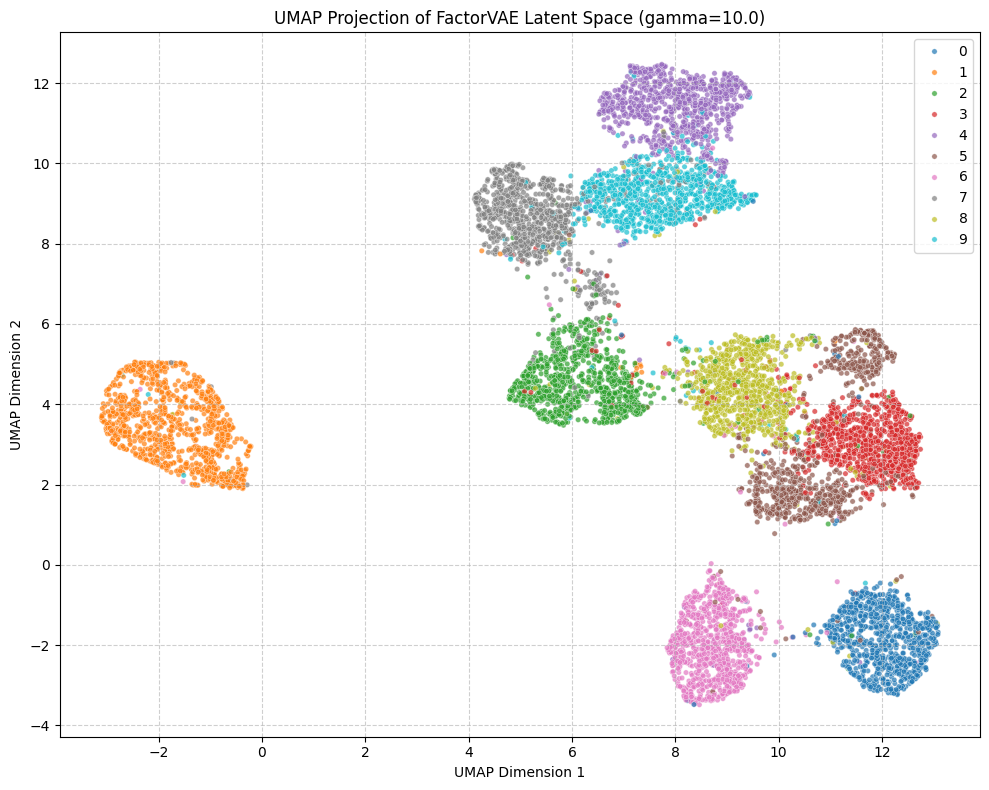

In [33]:
# V4: FactorVAE for comparison

# --- FactorVAE Model ---
# FactorVAE aims for disentanglement by adding a Total Correlation (TC) penalty.

class FactorVAE(nn.Module):
    def __init__(self, image_size, z_dim):
        super(FactorVAE, self).__init__()
        self.image_size = image_size
        self.z_dim = z_dim

        # Encoder (identical to Vanilla/Beta VAE)
        self.encoder = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128)
        )
        self.fc_mu = nn.Linear(128, z_dim)
        self.fc_logvar = nn.Linear(128, z_dim)

        # Decoder (identical to Vanilla/Beta VAE)
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, image_size),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        h = self.encoder(x.view(-1, self.image_size))
        mu = self.fc_mu(h)
        log_var = self.fc_logvar(h)
        z = self.reparameterize(mu, log_var)

        # Decode
        recon_x = self.decoder(z)
        return recon_x, mu, log_var, z # Return z for TC calculation

# --- Discriminator for FactorVAE ---
class Discriminator(nn.Module):
    def __init__(self, z_dim):
        super(Discriminator, self).__init__()
        self.z_dim = z_dim
        self.model = nn.Sequential(
            nn.Linear(z_dim, 1000),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1000, 1000),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1000, 1000),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1000, 1000),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1000, 1000),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1000, 1000),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1000, 2) # Output logits for binary classification (real vs. permuted)
        )

    def forward(self, z):
        return self.model(z)

# Instantiate the model
model = HDVAE(image_size, z1_dim, z2_dim, z3_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#print(model)

# --- FactorVAE Loss Function Components ---
# The loss calculation is more complex and will be handled within the training loop.
# Here's the KL divergence part, standard for VAEs.
def kl_divergence(mu, log_var):
    return -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

def calculate_metrics(original_images, reconstructed_images):
    original_np = original_images.detach().cpu().numpy().reshape(-1, 28, 28)
    reconstructed_np = reconstructed_images.detach().cpu().numpy().reshape(-1, 28, 28)
    psnr_scores = []
    ssim_scores = []
    for i in range(original_np.shape[0]):
        img_o = original_np[i]
        img_r = reconstructed_np[i]
        psnr = peak_signal_noise_ratio(img_o, img_r, data_range=1)
        psnr_scores.append(psnr)
        ssim = structural_similarity(img_o, img_r, data_range=1)
        ssim_scores.append(ssim)
    return np.mean(psnr_scores), np.mean(ssim_scores)

def plot_originals_and_reconstructions(original_images, reconstructed_images, title="", num_display=8):
    original_images = original_images.detach().cpu().squeeze()
    reconstructed_images = reconstructed_images.detach().cpu().squeeze()

    original_display = original_images[:num_display]
    reconstructed_display = reconstructed_images[:num_display]

    fig, axes = plt.subplots(2, num_display, figsize=(num_display * 1.5, 3))

    for i in range(num_display):
        axes[0, i].imshow(original_display[i].numpy(), cmap='gray')
        axes[0, i].axis('off')
        if i == 0: axes[0, i].set_title("Original", fontsize=8)

    for i in range(num_display):
        axes[1, i].imshow(reconstructed_display[i].numpy(), cmap='gray')
        axes[1, i].axis('off')
        if i == 0: axes[1, i].set_title("Reconstructed", fontsize=8)

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    plt.show()
    plt.close(fig)

def plot_sampled_images(sampled_images, title="", num_display=8, filename=None):
    sampled_images = sampled_images.detach().cpu().squeeze()

    fig, axes = plt.subplots(1, num_display, figsize=(num_display * 1.5, 1.5))

    for i in range(num_display):
        axes[i].imshow(sampled_images[i].numpy(), cmap='gray')
        axes[i].axis('off')

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    if filename:
        plt.savefig(filename)
    plt.show()
    plt.close(fig)

def plot_latent_space(latent_coords, labels, title, filename):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=latent_coords[:, 0], y=latent_coords[:, 1],
        hue=labels,
        palette=sns.color_palette("tab10", 10),
        legend="full",
        alpha=0.7,
        s=15 # Adjust point size
    )
    plt.title(title)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

def plot_all_latent_spaces_together(embeddings, labels, titles): # Removed filename, can save separately
    num_plots = len(embeddings)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 8))

    # Ensure axes is an array even for single plot case
    if num_plots == 1:
        axes = [axes]

    for i in range(num_plots):
        sns.scatterplot(
            x=embeddings[i][:, 0], y=embeddings[i][:, 1],
            hue=labels,
            palette=sns.color_palette("tab10", 10),
            legend="full" if i == 0 else False, # Only show legend once
            alpha=0.7,
            s=15,
            ax=axes[i] # Plot on specific subplot
        )
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("UMAP Dimension 1")
        axes[i].set_ylabel("UMAP Dimension 2")
        axes[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig(os.path.join("./latent_space_plots/", "all_umap_plots_combined_by_digit.png")) # Save for clarity
    plt.show()
    plt.close()


# --- NEW FUNCTION: Plotting Z1, Z2, Z3 on one UMAP ---
def plot_inter_layer_umap(all_latent_data, layer_labels, filename):
    """
    Plots the UMAP projection of concatenated Z1, Z2, Z3 means,
    colored by their originating layer (Z1, Z2, Z3).

    Args:
        all_latent_data (np.array): Concatenated mu1, mu2, mu3 data.
        layer_labels (np.array): Labels indicating origin layer ('Z1', 'Z2', 'Z3').
        filename (str): Path to save the plot.
    """
    print(f"Applying UMAP to combined latent spaces for inter-layer comparison (N={all_latent_data.shape[0]}, D={all_latent_data.shape[1]})...")

    # Initialize UMAP reducer. Adjust n_neighbors and min_dist if needed for different structures.
    # n_neighbors=15 (default) works well for balanced local/global structure.
    # For denser, more separated clusters, try lower min_dist (e.g., 0.1).
    reducer_combined = umap.UMAP(random_state=42)
    embedding_combined = reducer_combined.fit_transform(all_latent_data)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=embedding_combined[:, 0], y=embedding_combined[:, 1],
        hue=layer_labels,
        palette="viridis", # Or "deep", "Paired", etc. for distinct colors
        legend="full",
        alpha=0.7,
        s=15
    )
    plt.title("UMAP Projection of Z1, Z2, Z3 Latent Spaces (Colored by Layer Origin)")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()
    print(f"Inter-layer UMAP plot generated: {filename}")


# --- Training Loop (as before) ---
# --- Variables to store reconstruction and sampled data for the last epoch ---
last_epoch_original_images = None
last_epoch_reconstructed_images = None
last_epoch_sampled_images = None


# --- Setup for FactorVAE Training ---
factor_vae_z_dim = z1_dim # Still 64 for consistency
# Hyperparameter gamma for Total Correlation loss
factor_vae_gamma = 10.0 # Common values range from 1 to 100
# Discriminator training iterations per VAE training iteration
num_discriminator_steps = 1 # Usually 1 or 2

factor_vae_model = FactorVAE(image_size, factor_vae_z_dim).to(device)
discriminator_model = Discriminator(factor_vae_z_dim).to(device)

factor_vae_optimizer = torch.optim.Adam(factor_vae_model.parameters(), lr=learning_rate)
discriminator_optimizer = torch.optim.Adam(discriminator_model.parameters(), lr=learning_rate)

# Binary Cross-Entropy Loss for the discriminator
bce_logits = nn.CrossEntropyLoss() # For D, 2 output logits

print("\n--- FactorVAE Model ---")
print(factor_vae_model)
print("\n--- FactorVAE Discriminator Model ---")
print(discriminator_model)

# --- Training Loop for FactorVAE ---
print(f"\nStarting FactorVAE training with gamma = {factor_vae_gamma}...")
for epoch in range(num_epochs):
    factor_vae_model.train()
    discriminator_model.train()
    total_vae_loss = 0
    total_disc_loss = 0

    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)
        batch_size = images.size(0)

        # --- Train Discriminator ---
        for _ in range(num_discriminator_steps):
            discriminator_optimizer.zero_grad()

            recon_images, mu, log_var, z = factor_vae_model(images) # Get z for discriminator

            # Sample z from aggregate posterior q(z) - approximated by current batch z's
            # Create a permuted copy of z
            z_permuted = []
            for _z in z.transpose(0, 1): # Iterate over each latent dimension
                idx = torch.randperm(batch_size) # Random permutation for each dim
                z_permuted.append(_z[idx])
            z_permuted = torch.stack(z_permuted, 1) # Stack back to (batch_size, z_dim)

            # Pass through discriminator
            d_z = discriminator_model(z.detach()) # Detach z from VAE graph
            d_z_permuted = discriminator_model(z_permuted.detach()) # Detach z_permuted

            # Discriminator loss: try to classify real vs. permuted
            # Real samples should be classified as 0, permuted as 1 (or vice-versa depending on setup)
            real_labels = torch.zeros(batch_size).long().to(device) # Label 0 for original
            perm_labels = torch.ones(batch_size).long().to(device)  # Label 1 for permuted

            disc_loss = 0.5 * (bce_logits(d_z, real_labels) + bce_logits(d_z_permuted, perm_labels))

            disc_loss.backward()
            discriminator_optimizer.step()
            total_disc_loss += disc_loss.item()

        # --- Train VAE ---
        factor_vae_optimizer.zero_grad()

        recon_images, mu, log_var, z = factor_vae_model(images)

        # 1. Reconstruction Loss
        recon_loss = F.binary_cross_entropy(recon_images, images.view(-1, image_size), reduction='sum')

        # 2. KL Divergence (Standard VAE KLD)
        kld_loss = kl_divergence(mu, log_var)

        # 3. Total Correlation (TC) Loss
        # This term tries to fool the discriminator into thinking real samples are permuted.
        # It's log(D(z)) - log(1-D(z))
        d_z = discriminator_model(z) # No detach here, we want gradients to flow to VAE

        # Log-probabilities for TC calculation
        # The discriminator outputs 2 logits: [logit_real, logit_permuted]
        # P(z is real) = softmax(d_z)[0], P(z is permuted) = softmax(d_z)[1]
        # We want log(P(z is real) / P(z is permuted))

        # Safe way to compute log(P_real / P_permuted) or similar quantities
        # using log_softmax and then subtraction
        logits_real = d_z[:, 0]
        logits_perm = d_z[:, 1]

        # TC loss is derived from the discriminator's ability to distinguish real from permuted.
        # It's (log(D(z)_real) - log(D(z)_permuted)) for the VAE's loss,
        # encouraging D(z)_real to be small and D(z)_permuted to be large.
        # This is essentially making D(z) predict permuted for real samples.
        tc_loss = (logits_real - logits_perm).mean() # As per FactorVAE paper's interpretation

        # Full VAE Loss
        vae_loss = recon_loss + kld_loss + factor_vae_gamma * tc_loss

        vae_loss.backward()
        factor_vae_optimizer.step()
        total_vae_loss += vae_loss.item()

        if (i+1) % 100 == 0:
            print(f"FactorVAE - Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], VAE Loss: {vae_loss.item():.4f}, Disc Loss: {disc_loss.item():.4f}")

    avg_vae_loss = total_vae_loss / len(train_loader.dataset)
    avg_disc_loss = total_disc_loss / (len(train_loader.dataset) * num_discriminator_steps)


    # --- FactorVAE Evaluation ---
    factor_vae_model.eval()
    with torch.no_grad():
        recon_images_fixed_current_epoch_factor_vae, _, _, _ = factor_vae_model(fixed_test_images)

        # Sampling from FactorVAE
        z_sample_factor_vae = torch.randn(8, factor_vae_z_dim).to(device)
        sampled_out_factor_vae = factor_vae_model.decoder(z_sample_factor_vae).view(-1, 1, 28, 28)

        psnr_factor_vae, ssim_factor_vae = calculate_metrics(fixed_test_images, recon_images_fixed_current_epoch_factor_vae)

        print(f"FactorVAE - Epoch [{epoch+1}/{num_epochs}] completed. Avg VAE Loss: {avg_vae_loss:.4f}, PSNR: {psnr_factor_vae:.2f}, SSIM: {ssim_factor_vae:.4f}")

        # --- ADD THESE LINES ---
        factor_vae_psnr_history.append(psnr_factor_vae)
        factor_vae_ssim_history.append(ssim_factor_vae)
        factor_vae_loss_history.append(avg_vae_loss) # Store the average VAE loss

# --- Post-training Visualization for FactorVAE ---
print("\nCollecting FactorVAE latent space means for visualization (by digit label)...")
all_factor_vae_mus = []
all_factor_vae_labels = []

factor_vae_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        _, mu, _, _ = factor_vae_model(images) # Get mu for UMAP

        all_factor_vae_mus.append(mu.cpu().numpy())
        all_factor_vae_labels.append(labels.cpu().numpy())

all_factor_vae_mus = np.concatenate(all_factor_vae_mus, axis=0)
all_factor_vae_labels = np.concatenate(all_factor_vae_labels, axis=0)

print("Applying UMAP to FactorVAE latent space means (by digit label)...")
reducer_factor_vae = umap.UMAP(random_state=42)
embedding_factor_vae = reducer_factor_vae.fit_transform(all_factor_vae_mus)
plot_latent_space(embedding_factor_vae, all_factor_vae_labels,
                  f"UMAP Projection of FactorVAE Latent Space (gamma={factor_vae_gamma})",
                  "./latent_space_plots/umap_factor_vae_by_digit.png")



--- DIP-VAE-I Model ---
DIPVAE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
  )
  (fc_mu): Linear(in_features=128, out_features=64, bias=True)
  (fc_logvar): Linear(in_features=128, out_features=64, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

Starting DIP-VAE-I training with lambda = 100.0...
DIP-VAE-I - Epoch [1/10], Step [100/469], Loss: 28241.6738
DIP-VAE-I - Epoch [1/10], Step [200/469], Loss: 27802.7559
DIP-VAE-I - Epoch [1/10], Step [300/469], Loss: 27142.4180
DIP-VAE-I - Epoch [1/10], Step [400/469], Loss: 24375.1855
DIP-VAE-I - Epoch [1/10] completed.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


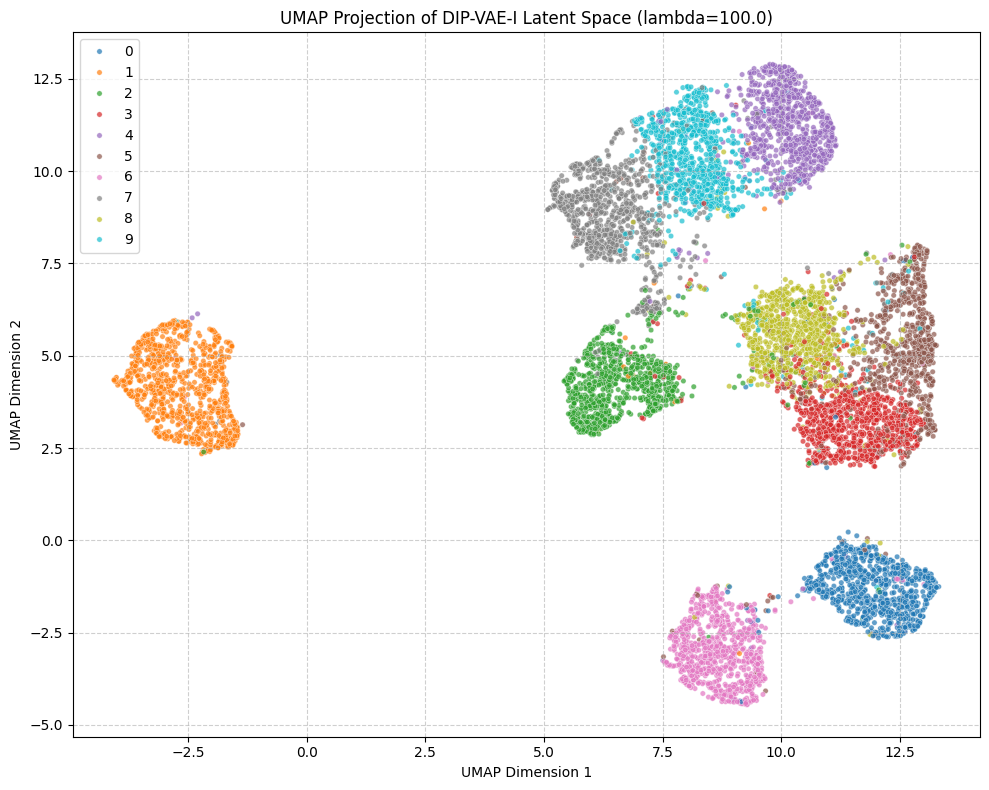

DIP-VAE-I latent space plot generated in './latent_space_plots/' directory.


In [34]:
# V4: DIP-VAE-I (Disentangled Inferred Prior VAE, Type I) for comparison

# --- DIP-VAE-I Model ---
# This model is structurally identical to the Vanilla VAE,
# but its loss function includes a regularization term on the covariance of the latent space.

class DIPVAE(nn.Module):
    def __init__(self, image_size, z_dim):
        super(DIPVAE, self).__init__()
        self.image_size = image_size
        self.z_dim = z_dim

        # Encoder (identical to previous VAEs)
        self.encoder = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128)
        )
        self.fc_mu = nn.Linear(128, z_dim)
        self.fc_logvar = nn.Linear(128, z_dim)

        # Decoder (identical to previous VAEs)
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, image_size),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        h = self.encoder(x.view(-1, self.image_size))
        mu = self.fc_mu(h)
        log_var = self.fc_logvar(h)
        z = self.reparameterize(mu, log_var)

        # Decode
        recon_x = self.decoder(z)
        return recon_x, mu, log_var, z # Return z for DIP-VAE regularization

# Instantiate the model
model = HDVAE(image_size, z1_dim, z2_dim, z3_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#print(model)

# --- DIP-VAE-I Loss Function (adapted to calculate covariance within the loop) ---
# The total loss will be calculated in the training loop.

# Function to calculate empirical covariance for a batch of latent vectors
def batch_covariance(z):
    batch_size = z.size(0)
    z_centered = z - z.mean(dim=0, keepdim=True)
    covariance = torch.matmul(z_centered.transpose(0, 1), z_centered) / (batch_size - 1)
    return covariance



def calculate_metrics(original_images, reconstructed_images):
    original_np = original_images.detach().cpu().numpy().reshape(-1, 28, 28)
    reconstructed_np = reconstructed_images.detach().cpu().numpy().reshape(-1, 28, 28)
    psnr_scores = []
    ssim_scores = []
    for i in range(original_np.shape[0]):
        img_o = original_np[i]
        img_r = reconstructed_np[i]
        psnr = peak_signal_noise_ratio(img_o, img_r, data_range=1)
        psnr_scores.append(psnr)
        ssim = structural_similarity(img_o, img_r, data_range=1)
        ssim_scores.append(ssim)
    return np.mean(psnr_scores), np.mean(ssim_scores)

def plot_originals_and_reconstructions(original_images, reconstructed_images, title="", num_display=8):
    original_images = original_images.detach().cpu().squeeze()
    reconstructed_images = reconstructed_images.detach().cpu().squeeze()

    original_display = original_images[:num_display]
    reconstructed_display = reconstructed_images[:num_display]

    fig, axes = plt.subplots(2, num_display, figsize=(num_display * 1.5, 3))

    for i in range(num_display):
        axes[0, i].imshow(original_display[i].numpy(), cmap='gray')
        axes[0, i].axis('off')
        if i == 0: axes[0, i].set_title("Original", fontsize=8)

    for i in range(num_display):
        axes[1, i].imshow(reconstructed_display[i].numpy(), cmap='gray')
        axes[1, i].axis('off')
        if i == 0: axes[1, i].set_title("Reconstructed", fontsize=8)

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    plt.show()
    plt.close(fig)

def plot_sampled_images(sampled_images, title="", num_display=8, filename=None):
    sampled_images = sampled_images.detach().cpu().squeeze()

    fig, axes = plt.subplots(1, num_display, figsize=(num_display * 1.5, 1.5))

    for i in range(num_display):
        axes[i].imshow(sampled_images[i].numpy(), cmap='gray')
        axes[i].axis('off')

    plt.suptitle(title, y=1.05, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 1.0])
    if filename:
        plt.savefig(filename)
    plt.show()
    plt.close(fig)

def plot_latent_space(latent_coords, labels, title, filename):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=latent_coords[:, 0], y=latent_coords[:, 1],
        hue=labels,
        palette=sns.color_palette("tab10", 10),
        legend="full",
        alpha=0.7,
        s=15 # Adjust point size
    )
    plt.title(title)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

def plot_all_latent_spaces_together(embeddings, labels, titles): # Removed filename, can save separately
    num_plots = len(embeddings)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 8))

    # Ensure axes is an array even for single plot case
    if num_plots == 1:
        axes = [axes]

    for i in range(num_plots):
        sns.scatterplot(
            x=embeddings[i][:, 0], y=embeddings[i][:, 1],
            hue=labels,
            palette=sns.color_palette("tab10", 10),
            legend="full" if i == 0 else False, # Only show legend once
            alpha=0.7,
            s=15,
            ax=axes[i] # Plot on specific subplot
        )
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("UMAP Dimension 1")
        axes[i].set_ylabel("UMAP Dimension 2")
        axes[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig(os.path.join("./latent_space_plots/", "all_umap_plots_combined_by_digit.png")) # Save for clarity
    plt.show()
    plt.close()


# --- NEW FUNCTION: Plotting Z1, Z2, Z3 on one UMAP ---
def plot_inter_layer_umap(all_latent_data, layer_labels, filename):
    """
    Plots the UMAP projection of concatenated Z1, Z2, Z3 means,
    colored by their originating layer (Z1, Z2, Z3).

    Args:
        all_latent_data (np.array): Concatenated mu1, mu2, mu3 data.
        layer_labels (np.array): Labels indicating origin layer ('Z1', 'Z2', 'Z3').
        filename (str): Path to save the plot.
    """
    print(f"Applying UMAP to combined latent spaces for inter-layer comparison (N={all_latent_data.shape[0]}, D={all_latent_data.shape[1]})...")

    # Initialize UMAP reducer. Adjust n_neighbors and min_dist if needed for different structures.
    # n_neighbors=15 (default) works well for balanced local/global structure.
    # For denser, more separated clusters, try lower min_dist (e.g., 0.1).
    reducer_combined = umap.UMAP(random_state=42)
    embedding_combined = reducer_combined.fit_transform(all_latent_data)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=embedding_combined[:, 0], y=embedding_combined[:, 1],
        hue=layer_labels,
        palette="viridis", # Or "deep", "Paired", etc. for distinct colors
        legend="full",
        alpha=0.7,
        s=15
    )
    plt.title("UMAP Projection of Z1, Z2, Z3 Latent Spaces (Colored by Layer Origin)")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()
    print(f"Inter-layer UMAP plot generated: {filename}")


# --- Training Loop (as before) ---
# --- Variables to store reconstruction and sampled data for the last epoch ---
last_epoch_original_images = None
last_epoch_reconstructed_images = None
last_epoch_sampled_images = None


# --- Setup for DIP-VAE-I Training ---
dip_vae_z_dim = z1_dim # Still 64 for consistency
# Hyperparameter lambda for DIP-VAE regularization
dip_vae_lambda = 100.0 # Common values range from 1 to 200 for MNIST
# Hyperparameter beta for standard KLD (we'll keep it 1.0 for simplicity, like vanilla)
dip_vae_beta = 1.0

dip_vae_model = DIPVAE(image_size, dip_vae_z_dim).to(device)
dip_vae_optimizer = torch.optim.Adam(dip_vae_model.parameters(), lr=learning_rate)

print("\n--- DIP-VAE-I Model ---")
print(dip_vae_model)

# --- Training Loop for DIP-VAE-I ---
print(f"\nStarting DIP-VAE-I training with lambda = {dip_vae_lambda}...")
for epoch in range(num_epochs):
    dip_vae_model.train()
    total_loss = 0

    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)
        batch_size = images.size(0)

        recon_images, mu, log_var, z = dip_vae_model(images) # Get z for regularization

        # 1. Reconstruction Loss
        bce_loss = F.binary_cross_entropy(recon_images, images.view(-1, image_size), reduction='sum')

        # 2. KL Divergence
        kld_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

        # 3. DIP-VAE-I Regularization Term
        # Calculate empirical covariance of z for the current batch
        z_cov = batch_covariance(z)

        # Create an identity matrix of size z_dim x z_dim
        identity_matrix = torch.eye(dip_vae_z_dim).to(device)

        # Calculate Frobenius norm squared of (Cov(z) - I)
        dip_loss = torch.norm(z_cov - identity_matrix, p='fro')**2

        # Total Loss
        loss = bce_loss + dip_vae_beta * kld_loss + dip_vae_lambda * dip_loss

        dip_vae_optimizer.zero_grad()
        loss.backward()
        dip_vae_optimizer.step()

        total_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f"DIP-VAE-I - Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    avg_loss = total_loss / len(train_loader.dataset)

    # --- DIP-VAE-I Evaluation ---
    dip_vae_model.eval()
    with torch.no_grad():
        recon_images_fixed_current_epoch_dip_vae, _, _, _ = dip_vae_model(fixed_test_images)

        # Sampling from DIP-VAE-I
        z_sample_dip_vae = torch.randn(8, dip_vae_z_dim).to(device)
        sampled_out_dip_vae = dip_vae_model.decoder(z_sample_dip_vae).view(-1, 1, 28, 28)

        psnr_dip_vae, ssim_dip_vae = calculate_metrics(fixed_test_images, recon_images_fixed_current_epoch_dip_vae)

        print(f"DIP-VAE-I - Epoch [{epoch+1}/{num_epochs}] completed. Avg Loss: {avg_loss:.4f}, PSNR: {psnr_dip_vae:.2f}, SSIM: {ssim_dip_vae:.4f}")

        # --- ADD THESE LINES ---

        dip_vae_psnr_history.append(psnr_dip_vae)
        dip_vae_ssim_history.append(ssim_dip_vae)
        dip_vae_loss_history.append(avg_loss)

# --- Post-training Visualization for DIP-VAE-I ---
print("\nCollecting DIP-VAE-I latent space means for visualization (by digit label)...")
all_dip_vae_mus = []
all_dip_vae_labels = []

dip_vae_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        _, mu, _, _ = dip_vae_model(images) # Get mu for UMAP

        all_dip_vae_mus.append(mu.cpu().numpy())
        all_dip_vae_labels.append(labels.cpu().numpy())

all_dip_vae_mus = np.concatenate(all_dip_vae_mus, axis=0)
all_dip_vae_labels = np.concatenate(all_dip_vae_labels, axis=0)

print("Applying UMAP to DIP-VAE-I latent space means (by digit label)...")
reducer_dip_vae = umap.UMAP(random_state=42)
embedding_dip_vae = reducer_dip_vae.fit_transform(all_dip_vae_mus)
plot_latent_space(embedding_dip_vae, all_dip_vae_labels,
                  f"UMAP Projection of DIP-VAE-I Latent Space (lambda={dip_vae_lambda})",
                  "./latent_space_plots/umap_dip_vae_by_digit.png")

print("DIP-VAE-I latent space plot generated in './latent_space_plots/' directory.")

In [35]:
import matplotlib.pyplot as plt
import os

# --- Consolidate all histories ---
all_model_metrics = {
    "HDVAE": {
        "psnr": hdvae_psnr_history,
        "ssim": hdvae_ssim_history,
        "loss": hdvae_loss_history,
    },
    "Vanilla VAE": {
        "psnr": vanilla_vae_psnr_history,
        "ssim": vanilla_vae_ssim_history,
        "loss": vanilla_vae_loss_history,
    },
    "Beta-VAE": {
        "psnr": beta_vae_psnr_history,
        "ssim": beta_vae_ssim_history,
        "loss": beta_vae_loss_history,
    },
    "FactorVAE": {
        "psnr": factor_vae_psnr_history,
        "ssim": factor_vae_ssim_history,
        "loss": factor_vae_loss_history,
    },
    "DIP-VAE-I": {
        "psnr": dip_vae_psnr_history,
        "ssim": dip_vae_ssim_history,
        "loss": dip_vae_loss_history,
    },
}



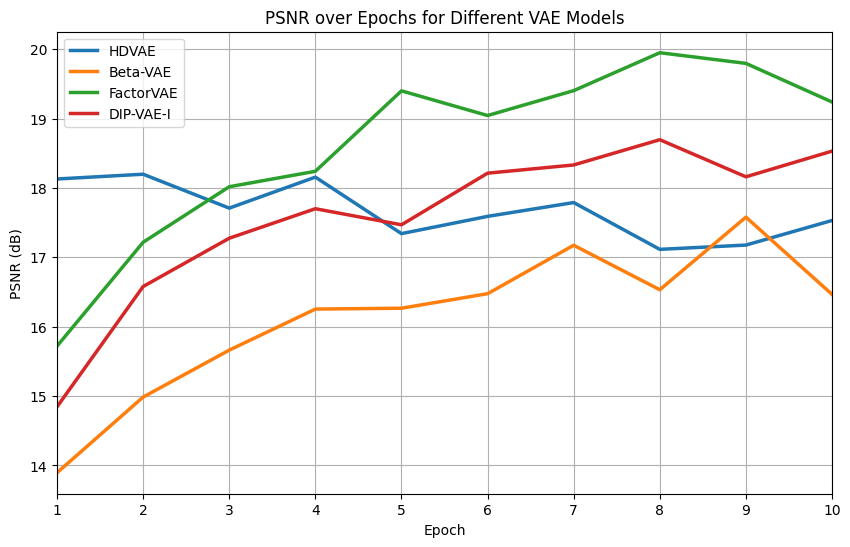

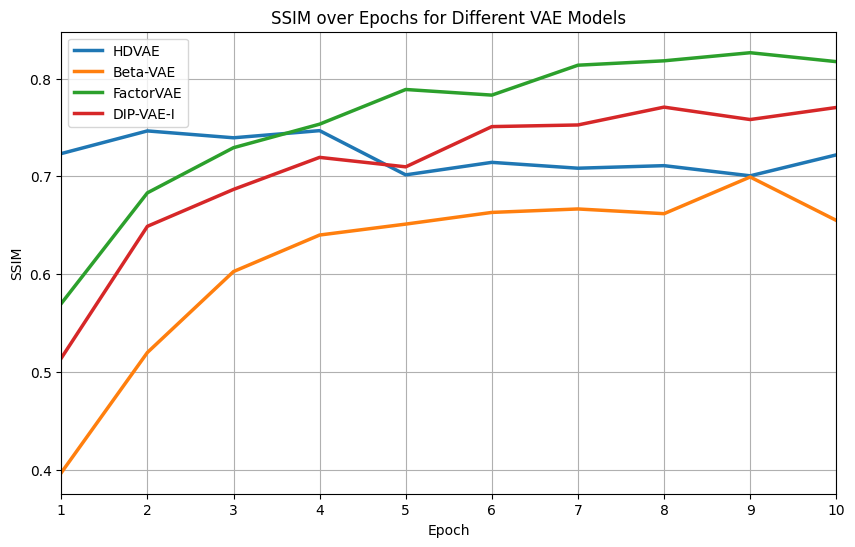

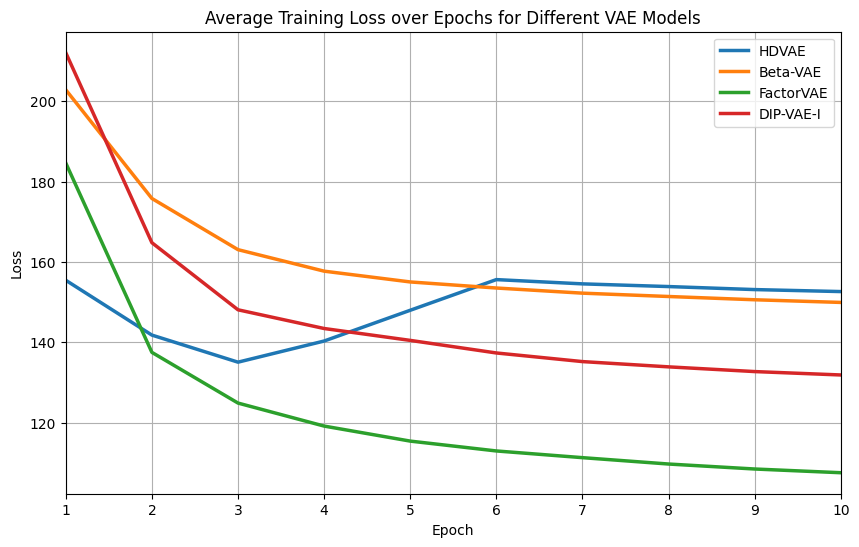


Comparative plots for PSNR, SSIM, and Loss saved to './comparison_plots_robust/' directory and displayed inline.


In [36]:
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Call the plotting function ---

# Ensure all_model_metrics and num_epochs are defined and populated.
# Calculate max_epochs_achieved (as done previously)
max_epochs_achieved = 0
for model_name, data in all_model_metrics.items():
    if data["psnr"]:
        max_epochs_achieved = max(max_epochs_achieved, len(data["psnr"]))
    if data["ssim"]:
        max_epochs_achieved = max(max_epochs_achieved, len(data["ssim"]))
    if data["loss"]:
        max_epochs_achieved = max(max_epochs_achieved, len(data["loss"]))


def plot_comparative_metrics_robust(metrics_data, max_epochs_for_x_axis, plot_dir="./comparison_plots_robust/"):
    os.makedirs(plot_dir, exist_ok=True)

    # Define a default line width
    line_thickness = 2.5 # You can adjust this value (e.g., 1.5, 2, 3)

    # Plot PSNR
    plt.figure(figsize=(10, 6))
    for model_name, data in metrics_data.items():
        if data["psnr"] and len(data["psnr"]) > 0:
            current_epochs = range(1, len(data["psnr"]) + 1)
            plt.plot(current_epochs, data["psnr"], label=model_name, linewidth=line_thickness) # <--- ADDED linewidth
    plt.title("PSNR over Epochs for Different VAE Models")
    plt.xlabel("Epoch")
    plt.ylabel("PSNR (dB)")
    plt.legend()
    plt.grid(True)
    plt.xlim(1, max_epochs_for_x_axis)
    plt.savefig(os.path.join(plot_dir, "comparative_psnr.png"))
    plt.show()
    plt.close()

    # Plot SSIM
    plt.figure(figsize=(10, 6))
    for model_name, data in metrics_data.items():
        if data["ssim"] and len(data["ssim"]) > 0:
            current_epochs = range(1, len(data["ssim"]) + 1)
            plt.plot(current_epochs, data["ssim"], label=model_name, linewidth=line_thickness) # <--- ADDED linewidth
    plt.title("SSIM over Epochs for Different VAE Models")
    plt.xlabel("Epoch")
    plt.ylabel("SSIM")
    plt.legend()
    plt.grid(True)
    plt.xlim(1, max_epochs_for_x_axis)
    plt.savefig(os.path.join(plot_dir, "comparative_ssim.png"))
    plt.show()
    plt.close()

    # Plot Loss
    plt.figure(figsize=(10, 6))
    for model_name, data in metrics_data.items():
        if data["loss"] and len(data["loss"]) > 0:
            current_epochs = range(1, len(data["loss"]) + 1)
            plt.plot(current_epochs, data["loss"], label=model_name, linewidth=line_thickness) # <--- ADDED linewidth
    plt.title("Average Training Loss over Epochs for Different VAE Models")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.xlim(1, max_epochs_for_x_axis)
    plt.savefig(os.path.join(plot_dir, "comparative_loss.png"))
    plt.show()
    plt.close()

# Call the robust plotting function
plot_comparative_metrics_robust(all_model_metrics, max_epochs_achieved)

print("\nComparative plots for PSNR, SSIM, and Loss saved to './comparison_plots_robust/' directory and displayed inline.")